<a href="https://colab.research.google.com/github/parthvasoya59/ML/blob/master/ML_all_basic_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/My Drive/ML/homeprices1.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


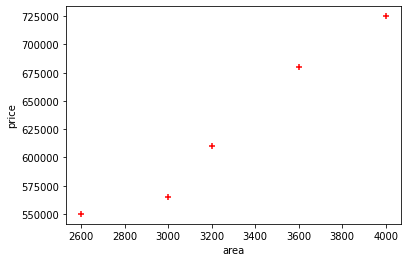

In [6]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [7]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [9]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.predict([[3300]])

array([628715.75342466])

In [12]:
reg.coef_

array([135.78767123])

In [13]:
reg.intercept_

180616.43835616432

## Multi Variable

In [14]:
df1 = pd.read_csv('/content/drive/My Drive/ML/homeprices2.csv')
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [17]:
df1.bedrooms.median()

4.0

In [19]:
df1.bedrooms = df1.bedrooms.fillna(df1.bedrooms.median())
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [22]:
reg1 = linear_model.LinearRegression()
reg1.fit(df1.drop('price',axis='columns'),df1.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
reg1.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [24]:
reg1.intercept_

221323.00186540396

In [27]:
reg1.predict([[3000,3,40]])

array([498408.25158031])

## **Dummy variable**

In [28]:
df2 = pd.read_csv('/content/drive/My Drive/ML/homeprices3.csv')
df2

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [30]:
dummies = pd.get_dummies(df2.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [31]:
merged = pd.concat([df2,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [32]:
final = merged.drop(['town'],axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [33]:
final = final.drop(['west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [34]:
X = final.drop('price',axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [35]:
y = final['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [36]:
y.shape

(13,)

In [37]:
X.shape

(13, 3)

In [38]:
model = linear_model.LinearRegression()

In [39]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [41]:
model.score(X,y)

0.9573929037221873

In [42]:
model.predict([[3400,0,0]])

array([681241.66845839])

## **sklearn OneHotEncoder**

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
df2

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [45]:
dfle = df2

In [46]:
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [49]:
X = dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [50]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [52]:
ct = ColumnTransformer([('town',OneHotEncoder(),[0])], remainder='passthrough')

In [53]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [54]:
X = X[:,1:]

In [55]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [57]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
model.predict([[0,1,3400]])

array([681241.6684584])

## **Training and Test and Split**

In [60]:
df3=pd.read_csv('/content/drive/My Drive/ML/carprices.csv')
df3.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


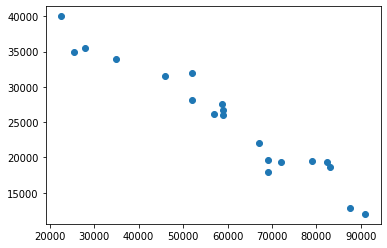

In [64]:
plt.scatter(df3['Mileage'],df3['Sell Price($)'])

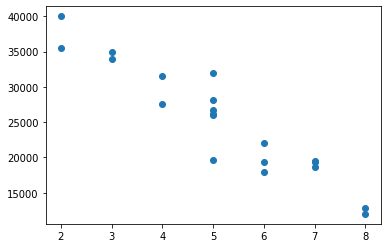

In [65]:
plt.scatter(df3['Age(yrs)'],df3['Sell Price($)'])

In [66]:
X = df3[['Mileage','Age(yrs)']]

In [67]:
y = df3['Sell Price($)']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [70]:
X.shape

(20, 2)

In [71]:
y.shape

(20,)

In [73]:
X_train.shape,X_test.shape

((14, 2), (6, 2))

In [74]:
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
clf.predict(X_test)

array([21096.3629719 , 13425.17617064, 26868.08382848, 23733.40128075,
       16984.17993471, 17721.75229888])

In [76]:
y_test

7     19300
8     12000
6     32000
17    19700
10    18700
11    19500
Name: Sell Price($), dtype: int64

In [77]:
X_test

,Mileage,Age(yrs)
7,72000,6
8,91000,8
6,52000,5
17,69000,5
10,83000,7
11,79000,7


In [78]:
clf.score(X_test,y_test)

0.7433463005978607

## **Logistic Regression Life insurance**

In [80]:
df4 = pd.read_csv('/content/drive/My Drive/ML/insurance_data.csv')

In [84]:
df4.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


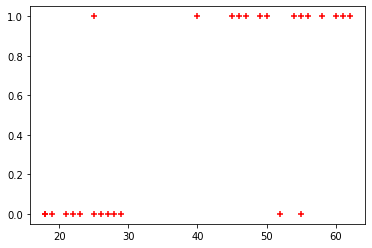

In [86]:
plt.scatter(df4.age,df4.bought_insurance,marker='+',color='red')

In [93]:
X_train,X_test,y_train,y_test = train_test_split(df4[['age']],df4.bought_insurance,train_size=0.8)

In [92]:
X_train.shape

(5, 1)

In [94]:
from sklearn import linear_model

In [95]:
model = linear_model.LogisticRegression()

In [96]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
X_test

,age
11,28
2,47
6,55
8,62
16,25
24,50


In [100]:
y_predicated = model.predict(X_test)

In [99]:
y_test

11    0
2     1
6     0
8     1
16    1
24    1
Name: bought_insurance, dtype: int64

In [101]:
model.predict_proba(X_test)

array([[0.9262935 , 0.0737065 ],
       [0.18327354, 0.81672646],
       [0.03957265, 0.96042735],
       [0.00926419, 0.99073581],
       [0.95956148, 0.04043852],
       [0.10622279, 0.89377721]])

In [102]:
model.score(X_test,y_test)

0.6666666666666666

In [103]:
y_predicated

array([0, 1, 1, 1, 0, 1])